# Importing Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Since no null value present we are good to continue

In [12]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

## Dataframe Description


The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 



# Checking the Datatype of columns

In [15]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [16]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [17]:
df.loc[df['Sex']== " "]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


#### None of the Sex column is blank that is good

In [18]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### We can see that Height is maintained as zero which is not possible

In [19]:
df.loc[df['Height']== 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [21]:
df.shape

(4177, 9)

#### We have total 4177 rows so dropping 2 rows I dont think will make any big difference

In [22]:
df = df.drop(labels=[1257,3996], axis=0)

In [31]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


 # Making DataFrame for Nominal data

In [33]:
df_visualization_nominal = df[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']].copy()

In [34]:
df_visualization_nominal.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Visualization of Data :

In [37]:
import seaborn as sns

M    1528
I    1340
F    1307
Name: Sex, dtype: int64


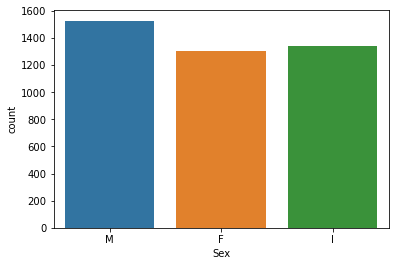

In [38]:
ax = sns.countplot(x="Sex",data=df_visualization_nominal)
print(df_visualization_nominal["Sex"].value_counts())

From the above data we can see that 1528 is Male, 1340 is Infant and 1307 is Female

# Visualization of ordinal Data

In [39]:
df_visualization_ordinal = df[["Sex","Rings"]].copy

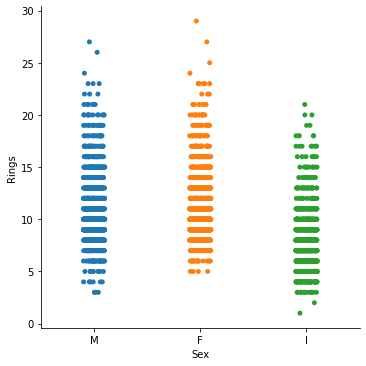

In [40]:
sns.catplot(x="Sex", y= "Rings", data=df)

# Checking the distribution of continious  value of the float datatype

In [45]:
df_visualization_continious= df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']]

<AxesSubplot:xlabel='Length', ylabel='Density'>

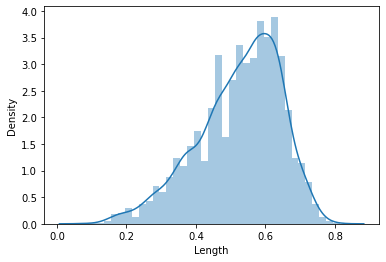

In [49]:
import seaborn as sns
sns.distplot(df_visualization_continious['Length'],kde=True)

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

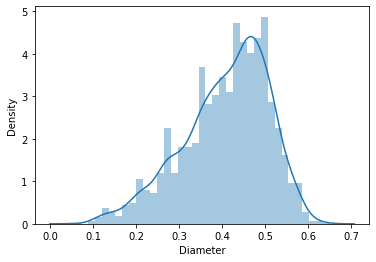

In [51]:
sns.distplot(df_visualization_continious['Diameter'],kde=True)

<AxesSubplot:xlabel='Height', ylabel='Density'>

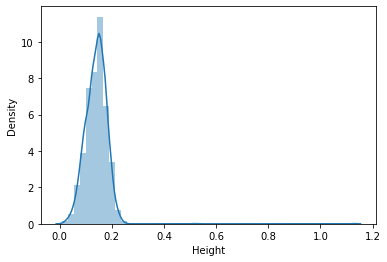

In [52]:
sns.distplot(df_visualization_continious['Height'],kde=True)

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

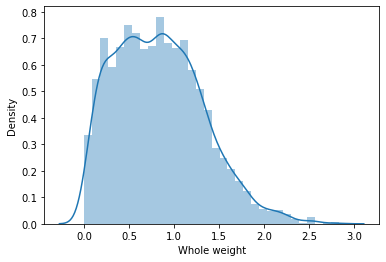

In [53]:
sns.distplot(df_visualization_continious['Whole weight'],kde=True)

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

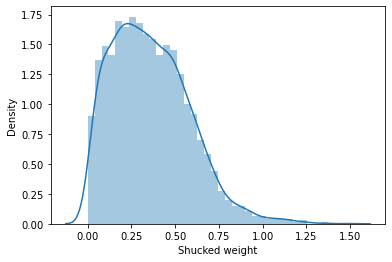

In [54]:
sns.distplot(df_visualization_continious['Shucked weight'],kde=True)

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

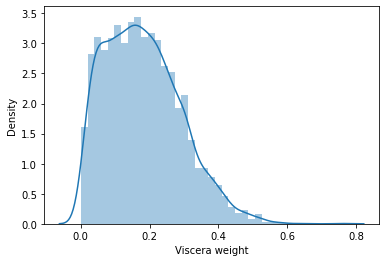

In [55]:
sns.distplot(df_visualization_continious['Viscera weight'],kde=True)

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

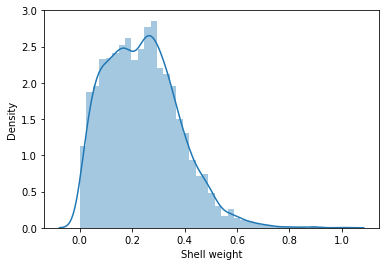

In [56]:
sns.distplot(df_visualization_continious['Shell weight'],kde=True)

<AxesSubplot:xlabel='Rings', ylabel='Density'>

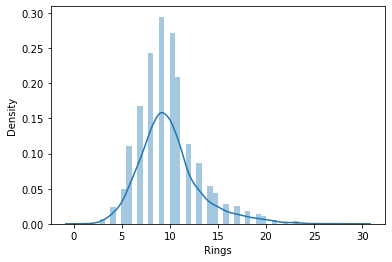

In [57]:
sns.distplot(df_visualization_continious['Rings'],kde=True)

# Encoding of DataFrame :

In [59]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [60]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [66]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Describe the Data

In [67]:
df.describe() 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,1.052934,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.822437,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.000000,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,2.000000,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

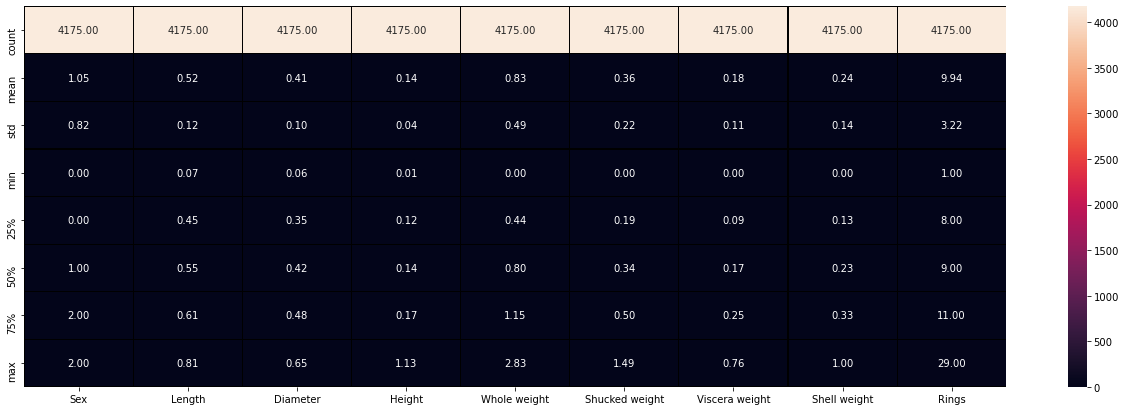

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

# Correlation of the columns with the target columns :

In [74]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036121,-0.038930,-0.042293,-0.021433,-0.001405,-0.032112,-0.034862,-0.034663
Length,-0.036121,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,-0.038930,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,-0.042293,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,-0.021433,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,-0.001405,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,-0.032112,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,-0.034862,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,-0.034663,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


<AxesSubplot:>

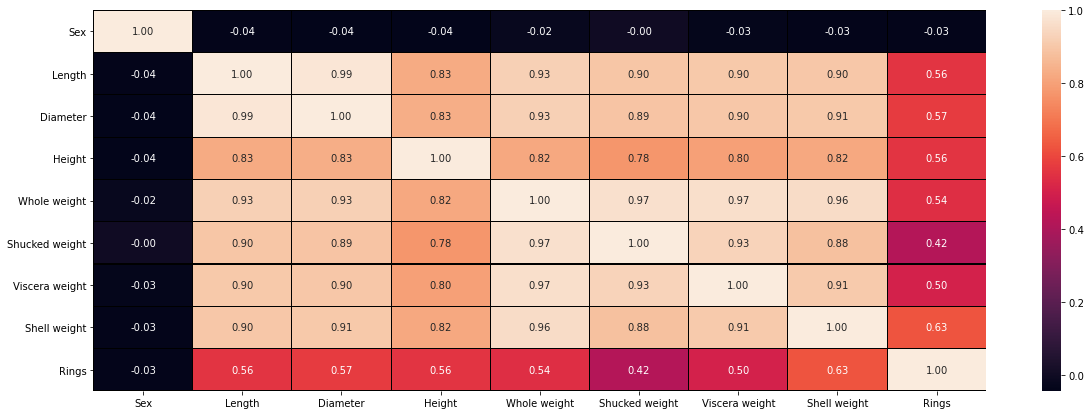

In [76]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

In [77]:
df.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

Keeping +/-0.5 as range of skewness, here are the columns which does not lie within the Range

Sex- Categorical 

Rings - target variable

Height is highly positively skewd

Shucked weight,Shell weight is positively Skewd

Length and Daimenter is Negatively Skewd

# Outliers Check

In [78]:
df.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

<AxesSubplot:>

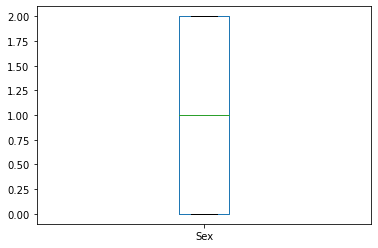

In [79]:
df['Sex'].plot.box()

<AxesSubplot:>

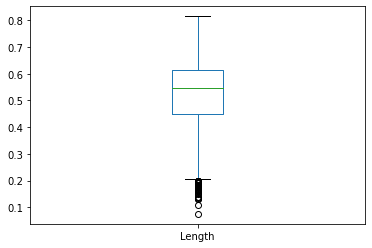

In [80]:
 df['Length'].plot.box()

<AxesSubplot:>

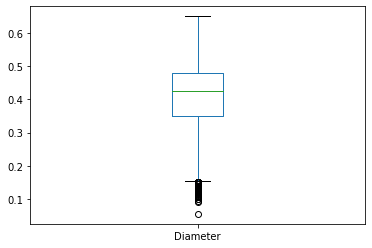

In [81]:
 df['Diameter'].plot.box()

<AxesSubplot:>

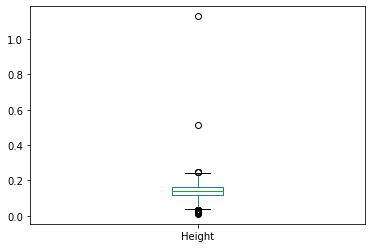

In [82]:
 df['Height'].plot.box()

<AxesSubplot:>

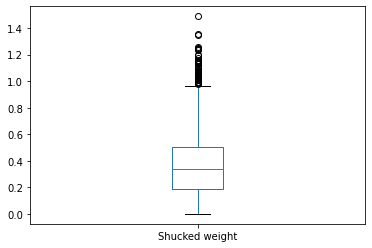

In [83]:
 df['Shucked weight'].plot.box()

<AxesSubplot:>

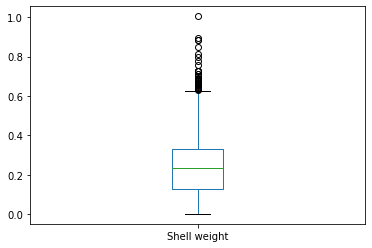

In [85]:
 df['Shell weight'].plot.box()

# Considering the Outlier removal

In [86]:
df.shape

(4175, 9)

In [88]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold =3 
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1416, 1416, 1417, 1421, 1425, 1426, 1426, 1426, 1427, 1428,
        1428, 1527, 1753, 1755, 1756, 1758, 1760, 1761, 1761, 1761, 1762,
        1762, 1762, 1820, 1981, 1985, 1986, 1986, 2050, 2089, 2107, 2107,
        2113, 2113, 2156, 2160, 2175, 2179, 2198, 2200, 2207, 2208, 2273,
        2274, 2304, 2333, 2333, 2333, 2334, 2343, 2357, 2367, 2380, 2435,
        2458, 2470, 2543, 2622, 2623, 

In [181]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [182]:
df_new_z.shape

(4027, 9)

# Percentage of Loss of data:

In [183]:
data_loss = ((4175-4027)/4175)*100

In [184]:
data_loss

3.5449101796407185

around 3.5% of Data has been loss. To remove skewness of so many columns I think it is good as only 3.5% data is loss

In [185]:
df_new_z.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
dtype: float64

I have run the model with the new dataset after running ZScore but the accuracy was not so good thats why I will go ahead with the outliers present in the Dataset

# Seperating the columns into features and target :

In [233]:
features = df.drop(["Rings"],axis=1)
target = df["Rings"]

In [234]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [235]:
import warnings
warnings.filterwarnings('ignore')

In [236]:
rr1_max =0
rr2_max = 0
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.25,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f" At random state{i}, the training accuracy is: {r2_score(target_train,pred_train)}")
    rr1 = r2_score(target_train,pred_train)
    print(f" At random state {i}, the testing accuracy is: {r2_score(target_test,pred_test)}")
    rr2 = r2_score(target_test,pred_test)
    print("\n")
    if rr1_max < rr1:
        rr1_max = rr1
    if rr2_max < rr2:
        rr2_max = rr2
print ("Max accuracy on train :", rr2)
print ("Max accuracy on test :", rr1)

 At random state0, the training accuracy is: 0.5368340814164809
 At random state 0, the testing accuracy is: 0.4945203419484766


 At random state1, the training accuracy is: 0.5284932843190442
 At random state 1, the testing accuracy is: 0.5235385444032963


 At random state2, the training accuracy is: 0.5329352506587253
 At random state 2, the testing accuracy is: 0.5118231087524326


 At random state3, the training accuracy is: 0.520315419539036
 At random state 3, the testing accuracy is: 0.5483412641968808


 At random state4, the training accuracy is: 0.533396317839031
 At random state 4, the testing accuracy is: 0.5091349797942825


 At random state5, the training accuracy is: 0.5365735114978696
 At random state 5, the testing accuracy is: 0.481782291562722


 At random state6, the training accuracy is: 0.5369227672286132
 At random state 6, the testing accuracy is: 0.4809046813828851


 At random state7, the training accuracy is: 0.5387324004768261
 At random state 7, the testi

 At random state 66, the testing accuracy is: 0.5116239729246836


 At random state67, the training accuracy is: 0.5346820581496015
 At random state 67, the testing accuracy is: 0.49171309171239186


 At random state68, the training accuracy is: 0.5349382878393649
 At random state 68, the testing accuracy is: 0.5046847260818887


 At random state69, the training accuracy is: 0.5312717432652343
 At random state 69, the testing accuracy is: 0.5147559702847839


 At random state70, the training accuracy is: 0.5289068320033853
 At random state 70, the testing accuracy is: 0.5207524654176054


 At random state71, the training accuracy is: 0.5347510835438404
 At random state 71, the testing accuracy is: 0.5037956990678727


 At random state72, the training accuracy is: 0.5366572454011074
 At random state 72, the testing accuracy is: 0.500885272798604


 At random state73, the training accuracy is: 0.5452333498830391
 At random state 73, the testing accuracy is: 0.4535085543054801


 At rando

In [237]:
features_train,features_test,target_train,target_test= train_test_split(features,target,test_size=0.25, random_state= 28)

In [238]:
lr.fit(features_train,target_train)

LinearRegression()

In [239]:
pred_test = lr.predict(features_test)

In [240]:
print(r2_score(target_test,pred_test))

0.5629363236672905


# Cross Validation of the model

In [241]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}")
    print("\n")      

At cross fold 2 the cv score is 0.5050768906989977 and accuracy score for training is -0.6036456213864883 and accuracy for testing is 0.5629363236672905


At cross fold 3 the cv score is 0.4855781829026004 and accuracy score for training is -0.6036456213864883 and accuracy for testing is 0.5629363236672905


At cross fold 4 the cv score is 0.37052450609470655 and accuracy score for training is -0.6036456213864883 and accuracy for testing is 0.5629363236672905


At cross fold 5 the cv score is 0.39818666715139034 and accuracy score for training is -0.6036456213864883 and accuracy for testing is 0.5629363236672905


At cross fold 6 the cv score is 0.3734260054087423 and accuracy score for training is -0.6036456213864883 and accuracy for testing is 0.5629363236672905


At cross fold 7 the cv score is 0.4277250865453634 and accuracy score for training is -0.6036456213864883 and accuracy for testing is 0.5629363236672905


At cross fold 8 the cv score is 0.3354055907575474 and accuracy scor

Since the number of folds don't have such impact on accuracy and cv_score , So CV= 2

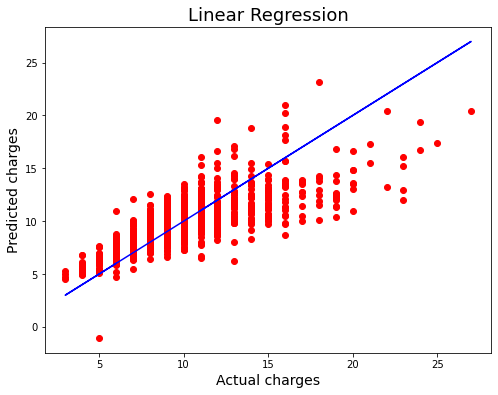

In [242]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Linear Regression',fontsize= 18)
plt.show()

# Regularization

In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [244]:
from sklearn.linear_model import Lasso
parameters = {'alpha': [.0001,.001,.01,.1,1,10,100],'random_state': list(range(0,15))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [246]:
ls = Lasso(alpha=0.001, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
lss= r2_score(target_test,pred_ls)
lss

0.5624033336325491

In [247]:
cv_score= cross_val_score(ls,features,target,cv=2)
cv_mean= cv_score.mean()
cv_mean

0.5095219726923168

# Ensemble technique:

In [248]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion': ['mse','mae'],'max_features': ["auto", "sqrt","log2"]}
rf = RandomForestRegressor()

clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [249]:
rf = RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score: ',rfs*100)

rfscore= cross_val_score(rf,features,target,cv=2)
rfc = rfscore.mean()
print('Cross Val Score :', rfc*100)

R2 Score:  58.99720705315239
Cross Val Score : 54.33346750664252


# Saving the Model

In [250]:
import pickle
filename = 'abalone.pkl'
pickle.dump(rf,open(filename, 'wb'))